# Tugas Praktikum

Tugas 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# === DATA AUGMENTATION MINIMAL ===
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
])

model = models.Sequential([
    data_aug,

    layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# FAST DATA PIPELINE
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(50000).batch(64).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.batch(64).prefetch(tf.data.AUTOTUNE)

history = model.fit(train_ds, epochs=12, validation_data=test_ds)

test_loss, test_acc = model.evaluate(test_ds)
print("Akurasi Testing:", test_acc)


Epoch 1/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 360ms/step - accuracy: 0.3400 - loss: 1.7764 - val_accuracy: 0.5742 - val_loss: 1.1980
Epoch 2/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 317s 354ms/step - accuracy: 0.6065 - loss: 1.1014 - val_accuracy: 0.6750 - val_loss: 0.9061
Epoch 3/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 277s 354ms/step - accuracy: 0.6982 - loss: 0.8710 - val_accuracy: 0.7339 - val_loss: 0.7682
Epoch 4/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 275s 352ms/step - accuracy: 0.7396 - loss: 0.7484 - val_accuracy: 0.7474 - val_loss: 0.7208
Epoch 5/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 345ms/step - accuracy: 0.7647 - loss: 0.6724 - val_accuracy: 0.7634 - val_loss: 0.6926
Epoch 6/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 282s 360ms/step - accuracy: 0.7878 - loss: 0.6126 - val_accuracy: 0.7801 - val_loss: 0.6486
Epoch 7/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 319s 357ms/step - accuracy: 0.8046 - loss: 0.5644 - val_accuracy: 0.7945 - val_loss: 0.6057
Epoch 8/12
782/782 ━━━━━━━━━━━━━━━━━━━━ 272s 347ms/step - accuracy: 0.8179 -

Tugas 2

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8952 - loss: 0.3339 - val_accuracy: 0.9859 - val_loss: 0.0426
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.9900 - val_loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9900 - val_loss: 0.0315
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9917 - val_loss: 0.0282
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9915 - val_loss: 0.0287
Epoch 8/10
1875/1875 ━━━━

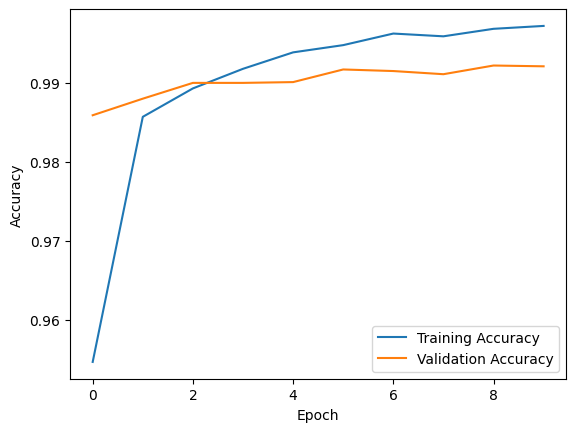

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load dataset MNIST
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# 2. Reshape data (MNIST grayscale → tambah channel 1)
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# 3. Normalisasi (0–255 → 0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# 4. Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 5. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Latih model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# 7. Evaluasi
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nAkurasi model:", test_acc)

# 8. Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
